<a href="https://www.kaggle.com/code/noeliafernandezpaez/student-performance-eda?scriptVersionId=224879518" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
#Importando las librerias necesarias.
#Importando el archivo y transformandolo a dataframe, para esto se agrega como input y se copia el path haciendole click en su nombre.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_performance = pd.read_csv("/kaggle/input/student-performance-and-learning-style/student_performance_large_dataset.csv")
student_performance = pd.DataFrame(student_performance)

In [2]:
#Obteniendo datos de nuestro dataset

student_performance.shape
student_performance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column                                   Non-Null Count  Dtype 
---  ------                                   --------------  ----- 
 0   Student_ID                               10000 non-null  object
 1   Age                                      10000 non-null  int64 
 2   Gender                                   10000 non-null  object
 3   Study_Hours_per_Week                     10000 non-null  int64 
 4   Preferred_Learning_Style                 10000 non-null  object
 5   Online_Courses_Completed                 10000 non-null  int64 
 6   Participation_in_Discussions             10000 non-null  object
 7   Assignment_Completion_Rate (%)           10000 non-null  int64 
 8   Exam_Score (%)                           10000 non-null  int64 
 9   Attendance_Rate (%)                      10000 non-null  int64 
 10  Use_of_Educational_Tech                  10000 non-null  ob

In [3]:
student_performance.describe()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate (%),Exam_Score (%),Attendance_Rate (%),Time_Spent_on_Social_Media (hours/week),Sleep_Hours_per_Night
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,23.478800,27.130300,10.007900,74.922000,70.188900,75.085100,14.936500,6.979300
std,3.461986,13.002547,6.136726,14.675437,17.649447,14.749251,9.022639,1.996965
min,18.000000,5.000000,0.000000,50.000000,40.000000,50.000000,0.000000,4.000000
25%,20.000000,16.000000,5.000000,62.000000,55.000000,62.000000,7.000000,5.000000
50%,23.000000,27.000000,10.000000,75.000000,70.000000,75.000000,15.000000,7.000000
75%,27.000000,38.000000,15.000000,88.000000,85.000000,88.000000,23.000000,9.000000
max,29.000000,49.000000,20.000000,100.000000,100.000000,100.000000,30.000000,10.000000


In [4]:
student_performance.isnull().sum()

#Concluimos que las columnas tienen el tipo correcto de datos y que no hay datos nulos.

Student_ID                                 0
Age                                        0
Gender                                     0
Study_Hours_per_Week                       0
Preferred_Learning_Style                   0
Online_Courses_Completed                   0
Participation_in_Discussions               0
Assignment_Completion_Rate (%)             0
Exam_Score (%)                             0
Attendance_Rate (%)                        0
Use_of_Educational_Tech                    0
Self_Reported_Stress_Level                 0
Time_Spent_on_Social_Media (hours/week)    0
Sleep_Hours_per_Night                      0
Final_Grade                                0
dtype: int64

In [5]:
#Cual es el estilo preferido para estudiar?

student_performance["Preferred_Learning_Style"].value_counts(sort = True, normalize=True)

Preferred_Learning_Style
Visual             0.2523
Kinesthetic        0.2513
Reading/Writing    0.2498
Auditory           0.2466
Name: proportion, dtype: float64

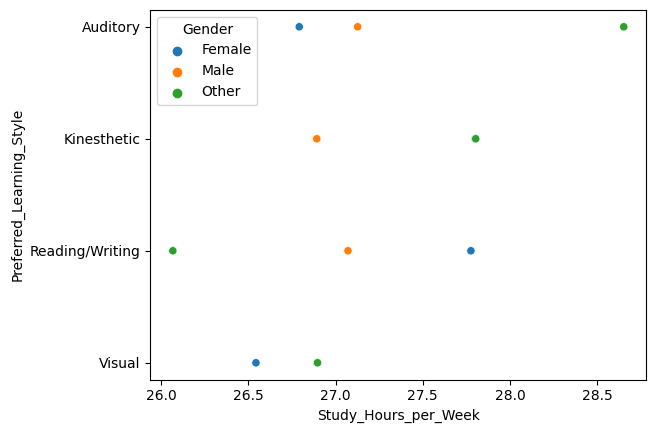

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_performance = pd.read_csv("/kaggle/input/student-performance-and-learning-style/student_performance_large_dataset.csv")
student_performance = pd.DataFrame(student_performance)

#Promedio de horas de estudio de acuerdo al genero y la preferencia en el estilo de estudio.

study_hours = student_performance.groupby(["Gender", "Preferred_Learning_Style"])["Study_Hours_per_Week"].mean()
study_hours = pd.DataFrame(study_hours)

sns.scatterplot(x='Study_Hours_per_Week', y='Preferred_Learning_Style', data=study_hours, hue='Gender')
plt.show()

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

student_performance = pd.read_csv("/kaggle/input/student-performance-and-learning-style/student_performance_large_dataset.csv")
student_performance = pd.DataFrame(student_performance)

student_performance["Sleep_Hours_per_Week"] = student_performance["Sleep_Hours_per_Night"] * 7
final_grade = student_performance.groupby(["Study_Hours_per_Week", "Sleep_Hours_per_Week"])["Self_Reported_Stress_Level"]
final_grade = pd.DataFrame(final_grade)

print(final_grade)

            0                                                  1
0     (5, 28)  171        Low
410     Medium
538        Low
1...
1     (5, 35)  86      Medium
250        Low
992       High
1...
2     (5, 42)  56        High
463        Low
557        Low
7...
3     (5, 49)  902     Medium
1044    Medium
1139       Low
1...
4     (5, 56)  108     Medium
307     Medium
669        Low
1...
..        ...                                                ...
310  (49, 42)  176       High
1046       Low
1256    Medium
1...
311  (49, 49)  336       High
676       High
1246    Medium
1...
312  (49, 56)  103     Medium
637        Low
686     Medium
7...
313  (49, 63)  167       High
357        Low
371        Low
6...
314  (49, 70)  6          Low
236     Medium
1624    Medium
1...

[315 rows x 2 columns]
